In [15]:
import os
import cv2
import numpy as np
from pycocotools import mask
import matplotlib.pyplot as plt

In [35]:
def normalized_data(input_dir,output_dir,mask=False):
  # loop over all files in the input directory
  for filename in os.listdir(input_dir):
    # read image from input directory
    image_path = os.path.join(input_dir, filename)
    if mask:
      mask_img = cv2.imread(image_path)[:,:,0]
      resized_img = cv2.resize(mask_img, (256,256))
      resized_img[resized_img > 0] = 255
    else:
      img = cv2.imread(image_path)
      grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      resized_img = cv2.resize(grey_img, (256,256))

    # write image to output directory
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, resized_img)

In [37]:
# specify input and output directories
input_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\Dataset\Brain scans\Tumor\TRAIN_masks'
output_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\tumor_data\masks'
normalized_data(input_dir,output_dir,True)

In [25]:
# specify input and output directories
input_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\Dataset\Brain scans\Tumor\TRAIN_masks'
output_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation\masks'
normalized_data(input_dir,output_dir,True)

In [24]:
def normalized_data2(input_dir,output_dir1,output_dir2):
  # loop over all files in the input directory
  for filename in os.listdir(input_dir):
    # read image from input directory
    image_path = os.path.join(input_dir, filename)
    # print(filename)
    if 'mask' in filename:
      mask_img = cv2.imread(image_path)[:,:,0]
      resized_img = cv2.resize(mask_img, (256,256))
      resized_img[resized_img > 0] = 255
      # write image to output directory
      # name = filename[:-10]
      new = 'b'+filename[8:]
      output_path = os.path.join(output_dir2, new)
      cv2.imwrite(output_path, resized_img)
    else:
      img = cv2.imread(image_path)
      grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      resized_img = cv2.resize(grey_img, (256,256))
      # write image to output directory
      name = filename[:-5]
      new = 'b'+name[8:]+'.png'
      output_path = os.path.join(output_dir1, new)
      cv2.imwrite(output_path, resized_img)

In [25]:
# specify input and output directories
input_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\Dataset\Breast scans\benign\Train'
output_dir1 = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\benign_data\train\images'
output_dir2 = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\benign_data\masks'
normalized_data2(input_dir,output_dir1,output_dir2)

In [38]:
def get_annotation(grey_mask):
        contour, _ = cv2.findContours(grey_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        # return contour[0].reshape(-1,2).astype('float')
        c = contour[0].reshape(-1,2).astype('float')
        c = c/grey_mask.shape[0]
        return [0] + c.flatten().tolist()

In [32]:
img_mask = cv2.imread(r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\masks\y0.png')[:,:,0]
s = get_annotation(img_mask)
img = cv2.imread(r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation\train\images\y0.jpg')

In [27]:
img2_mask = cv2.imread(r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\Dataset\Brain scans\Tumor\TRAIN_masks\y0.png')[:,:,0]
s2 = get_annotation(img2_mask)
img2 = cv2.imread(r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\Dataset\Brain scans\Tumor\TRAIN\y0.jpg')

In [39]:
def labels(input_dir,output_dir):
  # loop over all files in the input directory
  for filename in os.listdir(input_dir):
    textname = filename[:-3] + 'txt'
    # read image from input directory
    image_path = os.path.join(input_dir, filename)
    img = cv2.imread(image_path)[:,:,0]
    seg = get_annotation(img)
    if len(seg) > 6:
      output_path = os.path.join(output_dir, textname)
      with open(output_path, 'w') as file:
        str_data = ' '.join(map(str, seg))
        file.write(str_data)
    else:
      print(filename)

In [43]:
# specify input and output directories
input_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\tumor_data\masks'
output_dir = r'C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\tumor_data\train\labels'
labels(input_dir,output_dir)

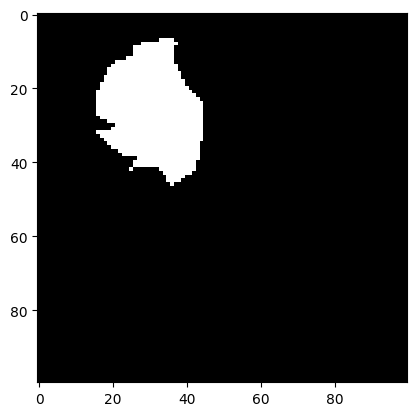

In [154]:
segmentation = get_annotation(resized_mask)

In [2]:
from ultralytics import YOLO
model = YOLO(r"C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\best.pt")
model.predict(source=r"C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation\train\images\y0.jpg",save=True,show_labels=True,show_conf=True,conf=0.5,save_txt=True,save_crop=False,line_thickness=1)


image 1/1 C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation\train\images\y0.jpg: 128x128 1 tumor, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 13.0ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs\segment\predict4
1 label saved to runs\segment\predict4\labels


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'tumor'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 

In [30]:
p=r"C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\benign_data\train\labels"
for filename in os.listdir(p):
  new = filename[1:]
  my_source = os.path.join(p, filename)
  my_dest = os.path.join(p, new)
  os.rename(my_source, my_dest)

In [14]:
label_dir = r"C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation_all\train\labels"
image_dir = r"C:\Users\ahmed\OneDrive - MTI (Faculty Of Computers & Artificial Intelligent)\Desktop\CV_Project\yolo_segmentation_all\train\images"

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        label_path = os.path.join(label_dir, filename)
        image_path = os.path.join(image_dir, os.path.splitext(filename)[0] + ".jpg")
        with open(label_path, "r") as f:
            lines = f.readlines()
            num_boxes = len(lines)
        num_segments = len(set([line.split()[0] for line in lines]))
        if num_boxes > num_segments:
            print(f"Bad image detected: {image_path[-8:]},{num_boxes},{num_segments}")

Bad image detected: b100.jpg,2,1
Bad image detected: b163.jpg,2,1
Bad image detected: b172.jpg,2,1
Bad image detected: b181.jpg,2,1
Bad image detected: b195.jpg,3,1
Bad image detected: \b25.jpg,2,1
Bad image detected: s\b4.jpg,2,1
Bad image detected: \b54.jpg,2,1
Bad image detected: \b58.jpg,2,1
Bad image detected: \b83.jpg,2,1
Bad image detected: \b92.jpg,2,1
Bad image detected: \b93.jpg,2,1
Bad image detected: \b98.jpg,2,1
